<a href="https://colab.research.google.com/github/antonietamg/AI-Art-Tools/blob/main/demo_GFPGAN_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.


In [ ]:
# Clone GFPGAN and enter the GFPGAN folder
%cd /content
!rm -rf GFPGAN
!git clone https://github.com/TencentARC/GFPGAN.git
%cd GFPGAN

# Set up the environment
# Install basicsr - https://github.com/xinntao/BasicSR
# We use BasicSR for both training and inference
!pip install basicsr
# Install facexlib - https://github.com/xinntao/facexlib
# We use face detection and face restoration helper in the facexlib package
!pip install facexlib
# Install other depencencies
!pip install -r requirements.txt
!python setup.py develop
!pip install realesrgan  # used for enhancing the background (non-face) regions
# Download the pre-trained model
# !wget https://github.com/TencentARC/GFPGAN/releases/download/v0.2.0/GFPGANCleanv1-NoCE-C2.pth -P experiments/pretrained_models
# Now we use the V1.3 model for the demo
!wget https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth -P experiments/pretrained_models


/content
Cloning into 'GFPGAN'...
remote: Enumerating objects: 444, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 444 (delta 4), reused 13 (delta 3), pack-reused 426
Receiving objects: 100% (444/444), 5.37 MiB | 12.13 MiB/s, done.
Resolving deltas: 100% (218/218), done.
/content/GFPGAN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 171 kB 36.2 MB/s 
     |████████████████████████████████| 5.8 MB 50.9 MB/s 
     |████████████████████████████████| 190 kB 53.5 MB/s 
  Created wheel for basicsr: filename=basicsr-1.4.1-py3-none-any.whl size=213765 sha256=b163e84de3cd8fbaacac556fb7f6fea7c6fdf45a6bbf69f6128b73e2e896f457
  Stored in directory: /root/.cache/pip/wheels/36/c5/b3/dc9fdd1dc0f95e37ef35144686bfa374cb81985a38a8539ba0
Successfully built basicsr
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

running develop
running egg_info
creating gfpgan.egg-info
writing gfpgan.egg-info/PKG-INFO
writing dependency_links to gfpgan.egg-info/dependency_links.txt
writing requirements to gfpgan.egg-info/requires.txt
writing top-level names to gfpgan.egg-info/top_level.txt
writing manifest file 'gfpgan.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'gfpgan.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/gfpgan.egg-link (link to .)
Adding gfpgan 1.3.4 to easy-install.pth file

Installed /content/GFPGAN
Processing dependencies for gfpgan==1.3.4
Searching for yapf==0.32.0
Best match: yapf 0.32.0
Adding yapf 0.32.0 to easy-install.pth file
Installing yapf script to /usr/local/bin
Installing yapf-diff script to /usr/local/bin

Using /usr/local/lib/python3.7/dist-packages
Searching for tqdm==4.64.0
Best match: tqdm 4.64.0
Adding tqdm 4.64.0 to easy-install.pth file
Installing tqdm script to /us

# 2. Upload Images / Use the demo images

In [ ]:
# upload your own images
import os
from google.colab import files
import shutil

upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving ID.jpg to ID.jpg
move ID.jpg to inputs/upload/ID.jpg


### OR you can use the demo image by running the following codes

In [ ]:
import shutil
import os
upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.makedirs(upload_folder, exist_ok=True)
shutil.move('inputs/whole_imgs/Blake_Lively.jpg', 'inputs/upload/Blake_Lively.jpg')

'inputs/upload/Blake_Lively.jpg'

## 3. Inference

In [ ]:
# Now we use the GFPGAN to restore the above low-quality images
# We use [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN) for enhancing the background (non-face) regions
# You can find the different models in https://github.com/TencentARC/GFPGAN#european_castle-model-zoo
!rm -rf results
!python inference_gfpgan.py -i inputs/upload -o results -v 1.3 -s 2 --bg_upsampler realesrgan

# Usage: python inference_gfpgan.py -i inputs/whole_imgs -o results -v 1.3 -s 2 [options]...
# 
#  -h                   show this help
#  -i input             Input image or folder. Default: inputs/whole_imgs
#  -o output            Output folder. Default: results
#  -v version           GFPGAN model version. Option: 1 | 1.2 | 1.3. Default: 1.3
#  -s upscale           The final upsampling scale of the image. Default: 2
#  -bg_upsampler        background upsampler. Default: realesrgan
#  -bg_tile             Tile size for background sampler, 0 for no tile during testing. Default: 400
#  -suffix              Suffix of the restored faces
#  -only_center_face    Only restore the center face
#  -aligned             Input are aligned faces
#  -ext                 Image extension. Options: auto | jpg | png, auto means using the same extension as inputs. Default: auto

!ls results/cmp

Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.1/RealESRGAN_x2plus.pth" to /usr/local/lib/python3.7/dist-packages/realesrgan/weights/RealESRGAN_x2plus.pth

100% 64.0M/64.0M [00:03<00:00, 17.5MB/s]
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /usr/local/lib/python3.7/dist-packages/facexlib/weights/detection_Resnet50_Final.pth

100% 

## 4. Visualize

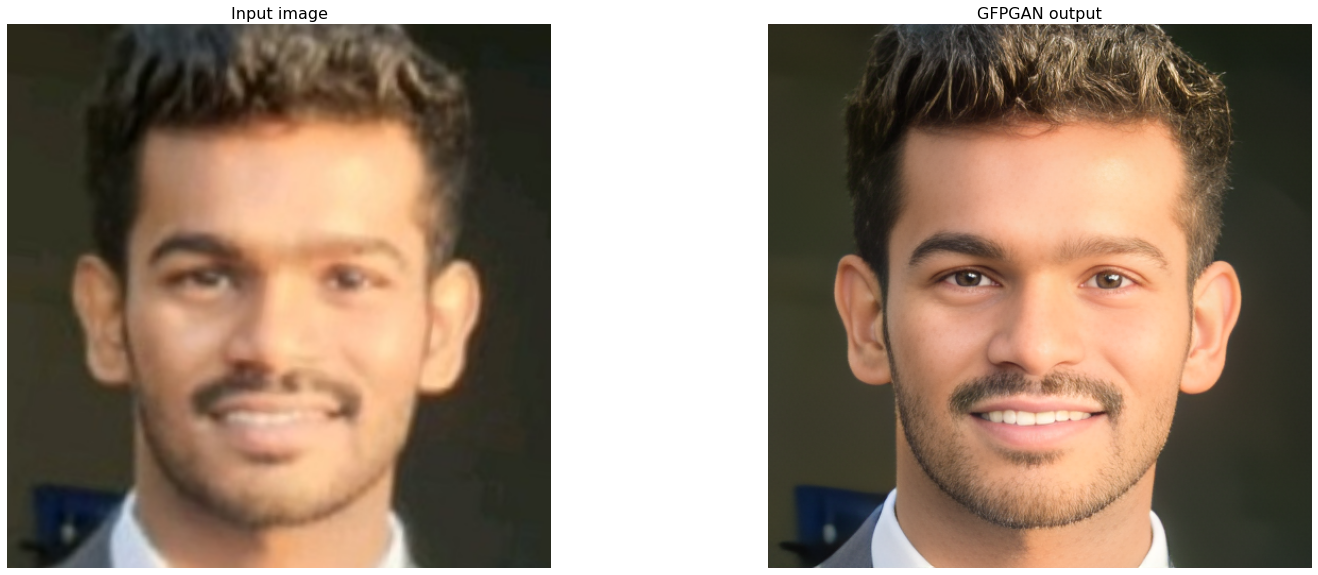

In [ ]:
# We first visualize the cropped faces
# The left are the inputs images; the right are the results of GFPGAN

import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('GFPGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'results/cropped_faces'
result_folder = 'results/restored_faces'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)


## 5. Download results

In [ ]:
# download the result
!ls results
print('Download results')
os.system('zip -r download.zip results')
files.download("download.zip")

cmp  cropped_faces  restored_faces  restored_imgs
Download results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>